<a href="https://colab.research.google.com/github/Manish-k723/Manish-k723/blob/main/KMeans_Cluster_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red Wine Quality Dataset Analysis**

In [20]:
# Importing neccessary libraries
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('/content/winequality-red.csv')

df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
#Extracting data of different columns of our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#Statistical information of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Gives Correlation of the different columns 
df.corr()

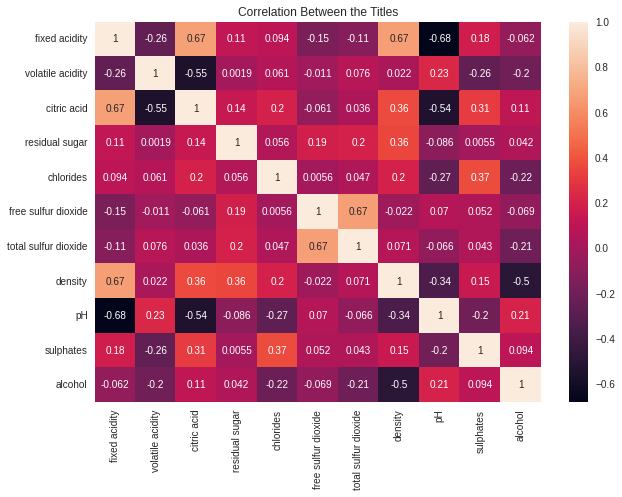

In [21]:
#Plotting the heatmap to understand relation between different components of the wine
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Between the different components')
plt.show()

In [6]:
#Dropping the target column
df = df.drop('quality',axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
#Possible number of clusters
np.sqrt(1599)

39.98749804626441

 We will not consider values more than 10 as a prominent candidate for role of K because when you will generate the graph again below the next code using range as (1,40), you will get your answer.

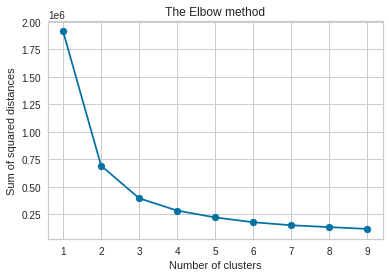

In [28]:
#Applying the Elbow method to determine the value of K
from sklearn.cluster import KMeans

sse= []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(df)
  sse.append(kmeans.inertia_)

plt.plot(range(1,10),sse)
plt.scatter(range(1,10),sse)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

From the above graph one of the thing which we can do is guess value of K by observing the point where graph is more prominent which for my view is 3. But we can ensure it by using another library called yellowbrick and also get surity with help of Silhouette method.

In [9]:
#Installing Yellowbrick
pip install yellowbrick 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


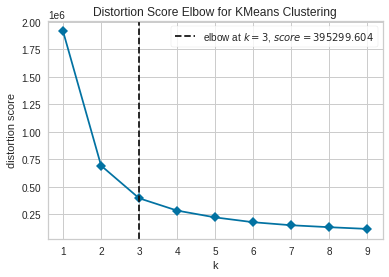

In [38]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),timings = False)
visualizer.fit(df)
visualizer.show() 

So, from this we can conclude that the given value of k is 3

For cluster: 2, the silhouette score is: 0.6034220347331241
For cluster: 3, the silhouette score is: 0.5198248517850188
For cluster: 4, the silhouette score is: 0.48971967046233833
For cluster: 5, the silhouette score is: 0.44743681893271126
For cluster: 6, the silhouette score is: 0.44850222651946337
For cluster: 7, the silhouette score is: 0.3953257536094922
For cluster: 8, the silhouette score is: 0.39125167029121855
For cluster: 9, the silhouette score is: 0.38692001580065116


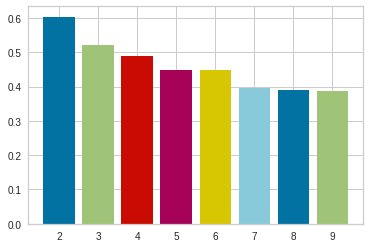

In [41]:
# Let's Apply Silhouette method to get more accuracy

from sklearn.metrics import silhouette_score

for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  df_pred = kmeans.fit(df)
  score = silhouette_score(df, kmeans.labels_)
  print("For cluster: {}, the silhouette score is: {}".format(i,score))
  plt.bar(i,score)

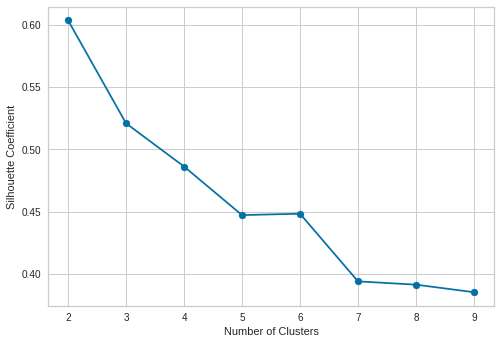

In [12]:
silhouette_coefficients = []

for i in range(2,10):
  kmeans = KMeans(n_clusters = i, max_iter = 100)
  kmeans.fit(df)
  score = silhouette_score(df,kmeans.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(2,10),silhouette_coefficients)
plt.scatter(range(2,10),silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [62]:
#We are using PCA to reduce the dimension of oure dataset.
from sklearn.decomposition import PCA

pca = PCA()#We can give preference for reducing the dimension. Here I am leaving the paranthesis blank, but we can also give any value
X = pca.fit_transform(df)

In [63]:
#Our dataset with reduced dimension
X

array([[-1.32249050e+01, -2.02389981e+00, -1.12682053e+00, ...,
         6.04748500e-03,  8.58546517e-03,  2.61696093e-04],
       [ 2.20377236e+01,  4.40832155e+00, -3.10377987e-01, ...,
        -8.93124784e-02, -1.54827617e-02,  2.43004575e-04],
       [ 7.16267333e+00, -2.50146086e+00, -5.81868296e-01, ...,
        -8.47930081e-02, -5.74870061e-03,  3.45630288e-04],
       ...,
       [-3.43135351e+00,  1.42712435e+01, -1.75071927e+00, ...,
        -2.05582922e-02, -1.68256197e-02,  1.02793769e-03],
       [ 1.13287834e+00,  1.63161673e+01, -2.13441396e+00, ...,
         1.28438964e-01, -2.33275432e-02, -2.68938068e-04],
       [-3.87437660e+00,  3.12634754e+00, -1.87414925e+00, ...,
         1.20132169e-01, -3.76903737e-02,  8.34644807e-04]])

In [64]:
kmeans = KMeans(n_clusters = 3)#Here we can change value of K
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

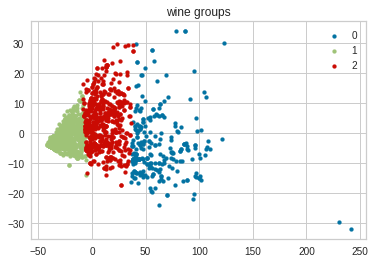

In [67]:
#Plotting the scattered graph for K=3, we can change value of K in above cell for seeing change in graph for other values too.
for i in unique_labels:
  plt.scatter(X[label == i,0],X[label==i, 1], label=i, s=15)

plt.legend()
plt.title('wine groups')
plt.show()